# 7. Images

We have now seen all the basic elements of Python, as well as a way to "store" images with Numpy, and can finally look at one. To import an image with a standard format (tif, jpg, png etc.) as a Numpy array we are using another package, called scikit-image and abbreviated as skimage.

skimage will be the backbone providing all image processing functions that we are going to use in this course. It covers all basic image processing operations as well as provides a vast number of more advances algorithm.

Let's import Numpy and Scikit-image:

In [3]:
import numpy as np
import skimage
import skimage.io

## 7.1 Importing

All import/export functions are grouped in the skimage.io submodule.

Most of the time the simplest command ```imread()``` will do the job. One has just to specifiy the path of the file or a url. In general your path is going to look something like:
```
image = io.imread('/Users/yourname/Desktop/MyData/Klee.jpg')
image = io.imread('http://whatevermysiteis.ch/image.tif')
```

In [4]:
#image = skimage.io.imread('https://cildata.crbs.ucsd.edu/media/images/13901/13901.tif')
image = skimage.io.imread('../Data/yeast.tif')

We can see that we are dealing with an array of numbers representing pixels:

In [5]:
image

array([[219, 225, 220, ..., 256, 258, 272],
       [218, 211, 217, ..., 270, 268, 278],
       [217, 217, 214, ..., 263, 268, 262],
       ...,
       [337, 343, 321, ..., 266, 287, 285],
       [320, 323, 339, ..., 268, 295, 281],
       [329, 353, 335, ..., 276, 281, 291]], dtype=uint16)

Let's verify that the image is indeed a Numpy array:

In [6]:
type(image)

numpy.ndarray

We can also check the image size:

In [7]:
image.shape

(1024, 1360)

So we have an image of 1024x1344 pixels.

## 7.2 Showing the image

To show the image we are going to use yet another package called Matplotlib. That package has offers very extensive plotting capabilities, allowing one to make a wide range of different plots and to adjust their rendering down to smallest details.

We are only going to use a tiny fraction of those capabilities and in particular we are going to use the ```imshow()``` function from the pyplot module extensively to render images.

In [8]:
import matplotlib.pyplot as plt

Rendering occurs in two steps: first one defines everything belonging in the image. It can be an image, a list of coordinates to plot, a second image to show in transparency etc.. and once this is done one calls the ```show()``` function to "finish" the image. 

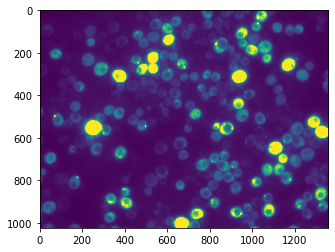

In [9]:
plt.imshow(image)
plt.show()

We are mainly going to to two adjustments: changing the color map, i.e. the color scale used to render pixels values, and the image size. 

To change the color map we use an additional argument for ```imshow()``` called cmap. For the size, we are going to use an additional command to first create a figure of the appropriate size:

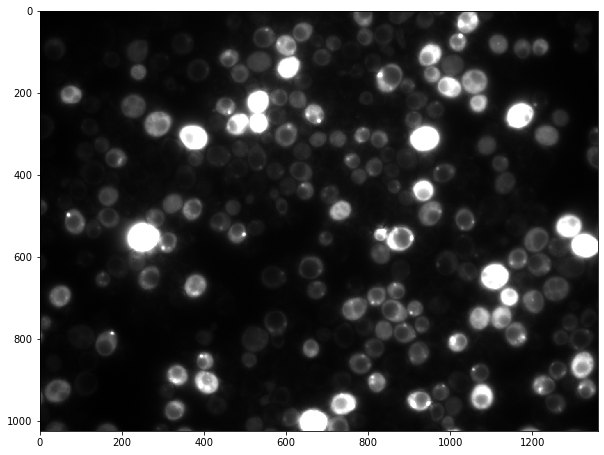

In [10]:
plt.subplots(figsize = (10,10))
plt.imshow(image, cmap = 'gray')
plt.show()


## 7.3 Image type

We have discussed previously the concept of type of a variable, dealing with integers, floats etc...

When working with images, we usually deal with pixels that have integer values. However, unlike in standard Python, for arrays we have some more details on what kind of integer we are dealing with.

The type of the array can be recovered with the dtype property.

In [11]:
image.dtype

dtype('uint16')

We see that we have an **unsigned integer 16 bit**. What does that mean ? The pixels can take any values that one can make using 16 bits (16 times a choice between 0 and 1) i.e. $2^{16} = 65536$ values, which Python means 0-65535. Usually an image has either 8 or 16 bit format. For 8 bit there are $2^{8}$ possible combinations of 0s and 1s and the possible values go from 0 to 255.

Of course, the rules that we defined for integers are also valide here. For example if we multiply the array by a float, the array becomes a float:

In [12]:
new_image = 1.5*image

In [13]:
new_image.dtype

dtype('float64')

If we know that for example a function needs an image with a specific type as input, we can also decide to explicitly "type" it:

In [14]:
image.dtype

dtype('uint16')

In [15]:
image2 = image.astype(float)

In [16]:
image2.dtype

dtype('float64')

## 7.4 Image histogram

An important information of an image is what is the distribution of intensities of its pixels. The simplest way to look represent this is with an histogram, which we can generate again with Matplotlib and its ```hist()``` function.

An important point is that we want to have a histogram of **all** pixels. As an image is organized in rows and columns, we have first to *flatten* it in order to create one long list of *unorganized* pixels using the Numpy ```ravel()``` function.

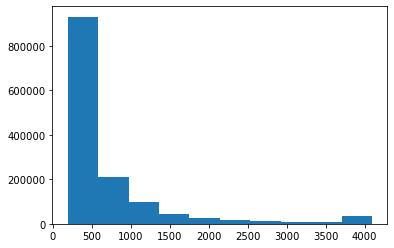

In [17]:
plt.hist(np.ravel(image))
plt.show()

If we need some more details (smaller bins) we can explicitly give bins:

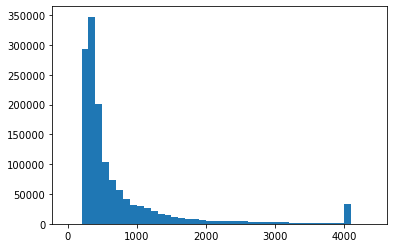

In [18]:
plt.hist(np.ravel(image), bins = np.arange(0,4500,100))
plt.show()